# Solve the heat equation explicitly and with the Euler algorithm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load necessary files
from PDE_Solver.solver import explicit_euler, parameters
from PDE_Solver.utils import plot_solution

# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load parameters
params = parameters.Parameters()

In [5]:
def apply_euler_algorithm(parameters):
    # Initialize output array
    u_euler = explicit_euler.initialize_output(params)
    
    # Create grid
    x, t = explicit_euler.create_grid(params)
    
    # Apply initial conditions
    u_euler = explicit_euler.define_initial_conditions(u_euler)
    # Apply boundary conditions
    u_euler = explicit_euler.define_boundary_conditions(u_euler, x)
    # Perform Euler algorithm
    u_euler = explicit_euler.perform_euler_algorithm(u_euler, params)
    
    return x, t, u_euler

In [6]:
# Set dx to 1 cm
params.dx = 1/100

# EULER SOLUTION
x_1_dx, t_1_dx, u_euler_1_dx = apply_euler_algorithm(params)

# ANALYTIC SOLUTION
u_explicit_1_dx = explicit_euler.initialize_output(params)
u_explicit_1_dx = explicit_euler.explicit_solution(u_explicit_1_dx, x_1_dx, t_1_dx, params)

In [7]:
# Set dx to 10 cm
params.dx = 1/10

# EULER SOLUTION
x_10_dx, t_10_dx, u_euler_10_dx = apply_euler_algorithm(params)

# ANALYTIC SOLUTION
u_explicit_10_dx = explicit_euler.initialize_output(params)
u_explicit_10_dx = explicit_euler.explicit_solution(u_explicit_10_dx, x_10_dx, t_10_dx, params)

C:\Users\amandink\AppData\Local\Temp\ipykernel_5676\1292554937.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(labels)
C:\Users\amandink\AppData\Local\Temp\ipykernel_5676\1292554937.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(labels)


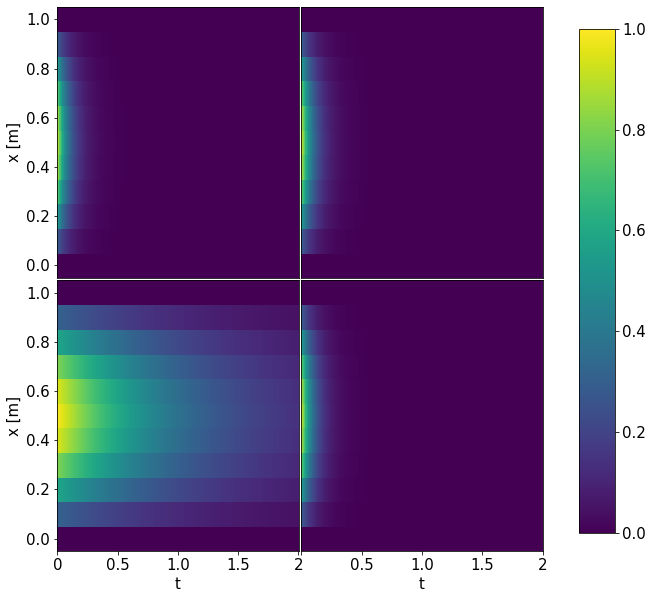

In [8]:
%matplotlib inline

# Plot solutions

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(2,2, figsize=(10, 10))
fig.subplots_adjust(wspace=0.01, hspace=0.01, right=0.8)

plt_u_euler_1_dx = axs[0,0].pcolor(t_1_dx, x_1_dx, u_euler_1_dx, shading='auto')
axs[0,0].set_ylabel('x [m]')
axs[0,0].set_xticks([])
#fig.colorbar(plt_u_euler_1_dx, ax=axs[0,0])
#axs[0,0].set_title('EULER: u, dx = 1cm')

plt_u_explicit_1_dx = axs[0,1].pcolor(t_1_dx, x_1_dx, u_explicit_1_dx, shading='auto')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_xlabel('t')
#axs[0,1].set_ylabel('x [m]')
#fig.colorbar(plt_u_explicit_1_dx, ax=axs[0,1])
#axs[0,1].set_title('ANALYTIC: u, dx = 1cm')

plt_u_euler_10_dx = axs[1,0].pcolor(t_10_dx, x_10_dx, u_euler_10_dx, shading='auto')
axs[1,0].set_xlabel('t')
labels = axs[1,0].get_xticks().tolist()
labels[1] = '0'
labels[5] = '2'
axs[1,0].set_xticklabels(labels)
axs[1,0].set_ylabel('x [m]')
#fig.colorbar(plt_u_euler_10_dx, ax=axs[1,0])
#axs[1,0].set_title('EULER: u, dx = 10cm')

plt_u_explicit_10_dx = axs[1,1].pcolor(t_10_dx, x_10_dx, u_explicit_10_dx, shading='auto')
axs[1,1].set_xlabel('t')
labels[1] = ''
axs[1,1].set_xticklabels(labels)
axs[1,1].set_yticks([])
#axs[1,1].set_ylabel('x [m]')
#fig.colorbar(plt_u_explicit_10_dx, ax=axs[1,1])
#axs[1,1].set_title('ANALYTIC: u, dx = 10cm')

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt_u_explicit_10_dx, cax=cbar_ax)

#fig.savefig('images\euler_analytic_solution.png')

In [9]:
# ERROR
error_1_dx = abs(u_explicit_1_dx - u_euler_1_dx)
error_10_dx = abs(u_explicit_10_dx - u_euler_10_dx)

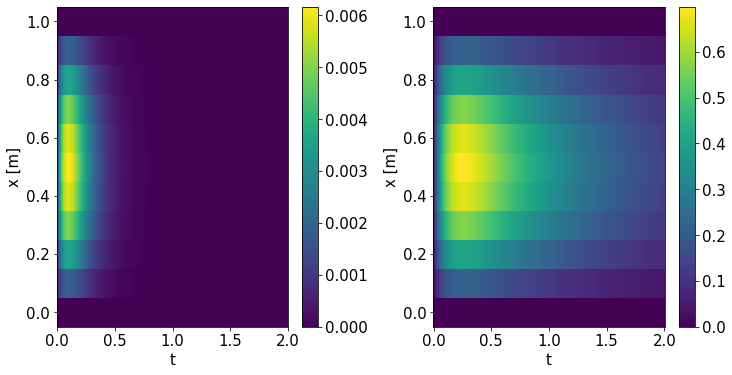

In [10]:
%matplotlib inline

# Plot errors

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1,2, figsize=(10, 5))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

plt_error_1_dx = axs[0].pcolor(t_1_dx, x_1_dx, error_1_dx, shading='auto')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x [m]')
fig.colorbar(plt_error_1_dx, ax=axs[0])
#axs[0].set_title('ERROR, dx = 1cm')

plt_error_10_dx = axs[1].pcolor(t_10_dx, x_10_dx, error_10_dx, shading='auto')
axs[1].set_xlabel('t')
axs[1].set_ylabel('x [m]')
fig.colorbar(plt_error_10_dx, ax=axs[1])
#axs[1].set_title('ERROR, dx = 10cm')

#fig.savefig('images\euler_analytic_abs_error.png')

##  Solution at two time points

Study the solutions at two time points $t_1$ and $t_2$ where $u(x, t_1)$ is smooth but still significantly curved and $u(x,t_2)$ is almost linear, close to the stationary state.

In [11]:
t1 = np.where(t_1_dx == 0.1)[0]
u_euler_1_dx_t1 = u_euler_1_dx[:,t1]
u_explicit_1_dx_t1 = u_explicit_1_dx[:,t1]

t2 = np.where(t_1_dx == 1.0)[0]
u_euler_1_dx_t2 = u_euler_1_dx[:,t2]
u_explicit_1_dx_t2 = u_explicit_1_dx[:,t2]

C:\Users\amandink\AppData\Local\Temp\ipykernel_5676\1392220671.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_yticklabels(labels_y_t2)
C:\Users\amandink\AppData\Local\Temp\ipykernel_5676\1392220671.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(labels_x_t2)


OSError: [Errno 22] Invalid argument: 'images\t1_t2_euler_analytic.png'

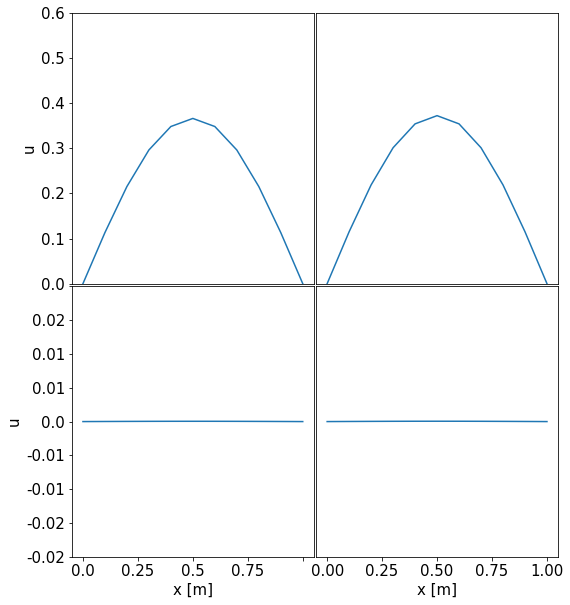

In [93]:
%matplotlib inline
plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(wspace=0.01, hspace=0.01, right=0.8)

axs[0,0].plot(x_1_dx, u_euler_1_dx_t1)
#axs[0,0].set_xlabel('x [m]')
axs[0,0].set_xticks([])
axs[0,0].set_ylabel('u')
axs[0,0].set_ylim(0,0.6)
#axs[0,0].set_title(r'EULER: $t = t_1$')

axs[0,1].plot(x_1_dx, u_explicit_1_dx_t1)
#axs[0,1].set_xlabel('x [m]')
#axs[0,1].set_ylabel('u')
axs[0,1].set_ylim(0,0.6)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_title(r'ANALYTIC: $t = t_1$')

axs[1,0].plot(x_1_dx, u_euler_1_dx_t2)
axs[1,0].set_xlabel('x [m]')
axs[1,0].set_ylabel('u')
axs[1,0].set_ylim(-0.02,0.02)

labels_y_t2 = np.around([float(i) for i in axs[1,0].get_yticks().tolist()],2)
labels_y_t2 = labels_y_t2[:-1]
axs[1,0].set_yticklabels(labels_y_t2)

labels_x_t2 = axs[1,0].get_xticks().tolist()
labels_x_t2[-2:] = ''
axs[1,0].set_xticklabels(labels_x_t2)

#axs[1,0].set_title(r'$EULER: t = t_2$')

axs[1,1].plot(x_1_dx, u_explicit_1_dx_t2)
axs[1,1].set_xlabel('x [m]')
#axs[1,1].set_ylabel('u')
axs[1,1].set_yticks([])
axs[1,1].set_ylim(-0.02,0.02)
#axs[1,1].set_title(r'ANALYTIC: $t = t_2$')

plt.savefig('images\t1_t2_euler_analytic.png')

## Study maximal error over $\Delta x$

In [52]:
delta_x = np.arange(0.003, 0.101, 1/1000)
max_error = np.empty([1, len(delta_x)])
max_error[:] = np.nan
mean_error = np.empty([1, len(delta_x)])
mean_error[:] = np.nan

for index, dx in enumerate(delta_x):
    params.dx = dx
    _, _, u_euler_temp_dx = apply_euler_algorithm(params)
    max_error[0, index] = np.nanmax(u_euler_temp_dx)
    mean_error[0, index] = np.nanmean(u_euler_temp_dx)
    
max_error = max_error.flatten()
mean_error = mean_error.flatten()

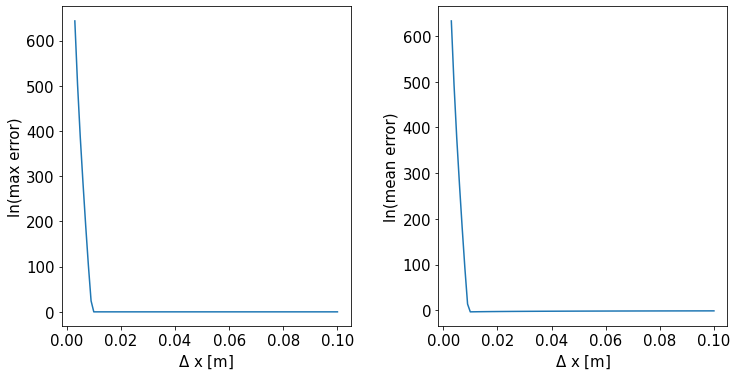

In [59]:
%matplotlib inline
plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

axs[0].plot(delta_x, np.log(max_error))
axs[0].set_xlabel(r'$\Delta$ x [m]')
axs[0].set_ylabel('ln(max error)')

axs[1].plot(delta_x, np.log(mean_error))
axs[1].set_xlabel(r'$\Delta$ x [m]')
axs[1].set_ylabel('ln(mean error)')

plt.savefig('images\max_mean_error_over_delta_x.png')